In [7]:
from nilearn.datasets import fetch_neurovault_motor_task
from nilearn.datasets import load_mni152_template

template = load_mni152_template()

motor_images = fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

%matplotlib inline

In [10]:
stat_img

'C:\\Users\\boywi/nilearn_data\\neurovault\\collection_658\\image_10426.nii.gz'

In [4]:
from nilearn.image import resample_to_img

resampled_stat_img = resample_to_img(stat_img, template)

In [5]:
# First load the original t-map in memory:
from nilearn.image import load_img
tmap_img = load_img(stat_img)

original_shape = tmap_img.shape
original_affine = tmap_img.affine

resampled_shape = resampled_stat_img.shape
resampled_affine = resampled_stat_img.affine

template_img = load_img(template)
template_shape = template_img.shape
template_affine = template_img.affine
print("""Shape comparison:
- Original t-map image shape : {0}
- Resampled t-map image shape: {1}
- Template image shape       : {2}
""".format(original_shape, resampled_shape, template_shape))

print("""Affine comparison:
- Original t-map image affine :\n {0}
- Resampled t-map image affine:\n {1}
- Template image affine       :\n {2}
""".format(original_affine, resampled_affine, template_affine))

Shape comparison:
- Original t-map image shape : (53, 63, 46)
- Resampled t-map image shape: (91, 109, 91)
- Template image shape       : (91, 109, 91)

Affine comparison:
- Original t-map image affine :
 [[  -3.    0.    0.   78.]
 [   0.    3.    0. -112.]
 [   0.    0.    3.  -50.]
 [   0.    0.    0.    1.]]
- Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]



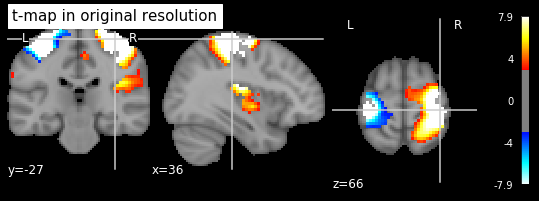

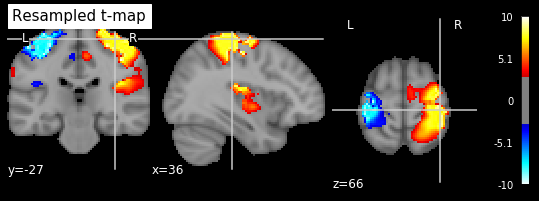

In [8]:
from nilearn import plotting

plotting.plot_stat_map(stat_img,
                       bg_img=template,
                       cut_coords=(36, -27, 66),
                       threshold=3,
                       title="t-map in original resolution")
plotting.plot_stat_map(resampled_stat_img,
                       bg_img=template,
                       cut_coords=(36, -27, 66),
                       threshold=3,
                       title="Resampled t-map")
plotting.show()